In [1]:
import scipy.ndimage as ndimage
import numpy as np
from matplotlib import pyplot as plt
from utils import load_data

In [2]:
sobel_z = np.array([[[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]], 
                    
                    [[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]], 
                    
                    [[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]]])
sobel_y = np.array([[[0, -1, 0], [0, 0, 0], [0, 1, 0]], 
                    [[-1, -2, -1], [0, 0, 0], [1, 2, 1]], 
                    [[0, -1, 0], [0, 0, 0], [0, 1, 0]]])
sobel_x = np.array([[[0, -1, 0], [-1, -2, -1], [0, -1, 0]], 
                    [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 
                    [[0, 1, 0], [1, 2, 1], [0, 1, 0]]])

# sobel_z = np.array([[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], [[-2, 0, 2], [-3, 0, 3], [-2, 0, 2]], [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]])
# sobel_y = np.array([[[-1, -2, -1], [0, 0, 0], [1, 2, 1]], [[-2, -3, -2], [0, 0, 0], [2, 3, 2]], [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]])
# sobel_x = np.array([[[-1, -2, -1], [-2, -3, -2], [-1, -2, -1]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[1, 2, 1], [2, 3, 2], [1, 2, 1]]])

# sobel_z = np.array([[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], [[-2, 0, 2], [-3, 1, 3], [-2, 0, 2]], [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]])
# sobel_y = np.array([[[-1, -2, -1], [0, 0, 0], [1, 2, 1]], [[-2, -3, -2], [0, 1, 0], [2, 3, 2]], [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]])
# sobel_x = np.array([[[-1, -2, -1], [-2, -3, -2], [-1, -2, -1]], [[0, 0, 0], [0, 1, 0], [0, 0, 0]], [[1, 2, 1], [2, 3, 2], [1, 2, 1]]])

# sobel_z = np.array([[[-1, 0, 1], [-2, 1, 2], [-1, 0, 1]], [[-2, 1, 2], [-3, 2, 3], [-2, 1, 2]], [[-1, 0, 1], [-2, 1, 2], [-1, 0, 1]]])
# sobel_y = np.array([[[-1, -2, -1], [0, 1, 0], [1, 2, 1]], [[-2, -3, -2], [1, 2, 1], [2, 3, 2]], [[-1, -2, -1], [0, 1, 0], [1, 2, 1]]])
# sobel_x = np.array([[[-1, -2, -1], [-2, -3, -2], [-1, -2, -1]], [[0, 1, 0], [1, 2, 1], [0, 1, 0]], [[1, 2, 1], [2, 3, 2], [1, 2, 1]]])

In [6]:
sobel_x

array([[[ 0, -1,  0],
        [-1, -2, -1],
        [ 0, -1,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  1,  0],
        [ 1,  2,  1],
        [ 0,  1,  0]]])

In [7]:
np.rot90(sobel_z, 1, (2, 0))

array([[[ 0, -1,  0],
        [-1, -2, -1],
        [ 0, -1,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  1,  0],
        [ 1,  2,  1],
        [ 0,  1,  0]]])

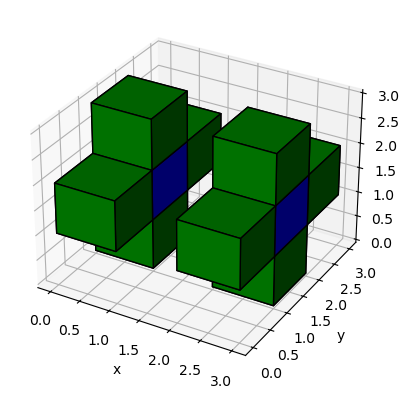

In [4]:
ax = plt.figure().add_subplot(projection='3d')
colors = np.empty(sobel_x.shape, dtype=object)
colors[sobel_x == 3] = 'red'
colors[sobel_x == 2] = 'blue'
colors[sobel_x == 1] = 'green'
colors[sobel_x == -1] = 'green'
colors[sobel_x == -2] = 'blue'
colors[sobel_x == -3] = 'red'
colors[sobel_x == 0] = 'gray'
ax.voxels(sobel_x, facecolors=colors, edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [5]:
file_path_img_r = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_1620proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
file_path_img_m = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_810proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
# Data loading
img_r = load_data(file_path_img_r, data_range=255, normalize=True, batch=False)[300:700, 200:600, 200:600]
img_m = load_data(file_path_img_m, data_range=255, normalize=True, batch=False)[300:700, 200:600, 200:600]

In [6]:
# img_r = ndimage.gaussian_filter(img_r, sigma=1)

In [7]:
img_r_sobel_x = ndimage.correlate(img_r, sobel_x)
img_r_sobel_y = ndimage.correlate(img_r, sobel_y)
img_r_sobel_z = ndimage.correlate(img_r, sobel_z)

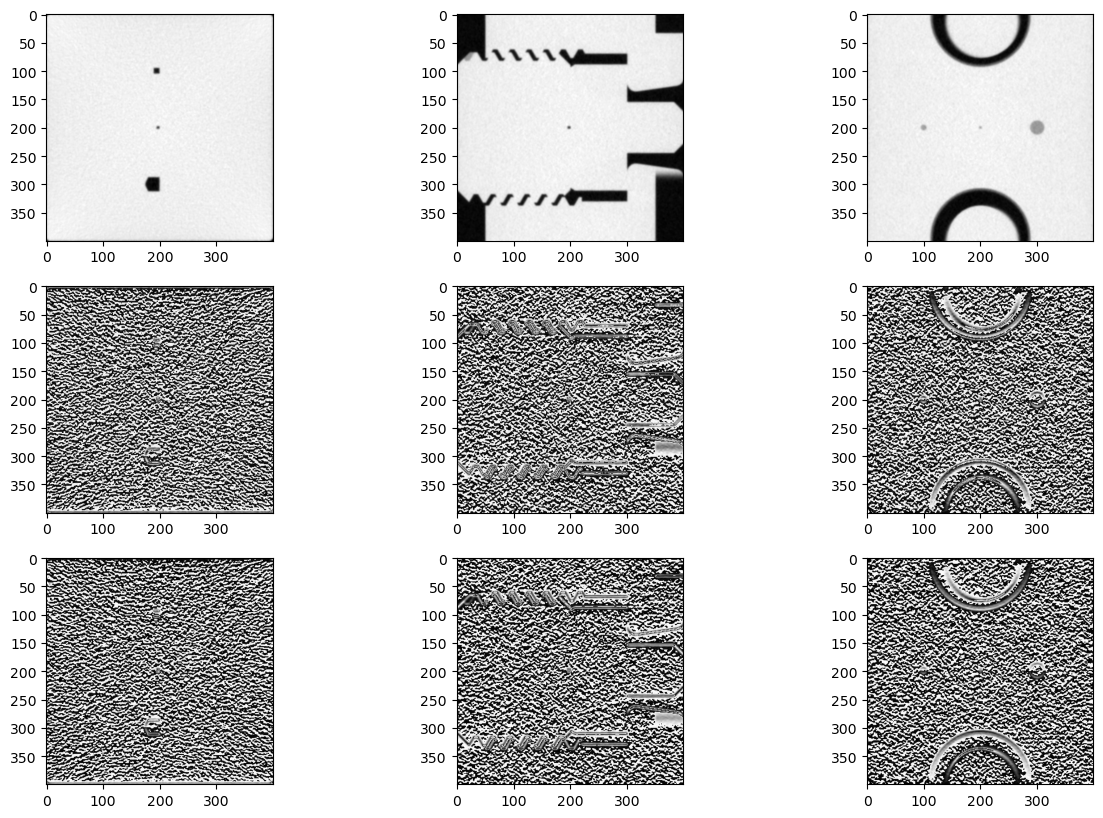

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs[0][0].imshow(img_r[200, :, :], cmap='gray')
axs[0][1].imshow(img_r[:, 200, :], cmap='gray')
axs[0][2].imshow(img_r[:, :, 200], cmap='gray')
axs[1][0].imshow(img_r_sobel_y[200, :, :], cmap='gray')
axs[1][1].imshow(img_r_sobel_x[:, 200, :], cmap='gray')
axs[1][2].imshow(img_r_sobel_x[:, :, 200], cmap='gray')
axs[2][0].imshow(ndimage.sobel(img_r[200, :, :], axis=0), cmap='gray')
axs[2][1].imshow(ndimage.sobel(img_r[:, 200, :], axis=0), cmap='gray')
axs[2][2].imshow(ndimage.sobel(img_r[:, :, 200], axis=0), cmap='gray')

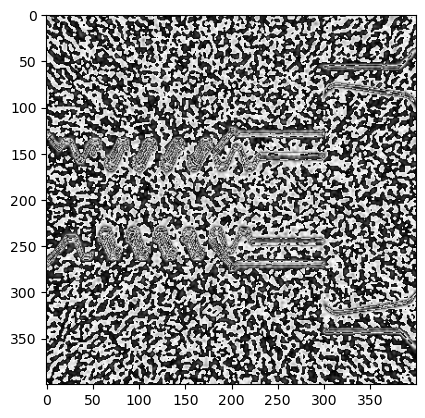

In [15]:
sobel_a = [[-1, 0, 1], 
           [-2, 0, 2], 
           [-1, 0, 1]]
sobel_b = [[-1, -2, -1], 
           [0, 0, 0], 
           [1, 2, 1]]
# v = img_r[200, :, :]
# res = ndimage.correlate(v, sobel_b)
res_1 = ndimage.sobel(img_r, axis=0)
res_2 = ndimage.sobel(img_r, axis=1)
res_3 = ndimage.sobel(img_r, axis=2)
g_1 = np.sqrt(res_1**2 + res_2**2)
plt.imshow(res_1[50, :, :], cmap='gray')